In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

In [23]:
(X_train,y_train1),(X_test,y_test1)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [25]:
def build_model(input_size):
  input = keras.layers.Input(input_size)
  x = keras.layers.Flatten()(input)
  x = keras.layers.Dense(256,'relu')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Dropout(0.4)(x)
  x = keras.layers.Dense(128,'relu')(x)
  x= keras.layers.BatchNormalization()(x)
  x= keras.layers.Dropout(0.4)(x)
  output = keras.layers.Dense(10,activation='softmax')(x)

  model=keras.Model(inputs=input,outputs=output)
  return model

In [28]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


5


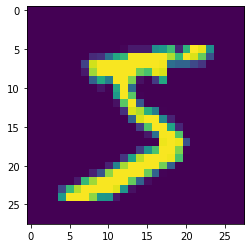

In [27]:
plt.imshow(X_train[0])
print(y_train1[0])

In [31]:
y_train=np.zeros((60000,10),dtype='uint8')
for i in range(y_train.shape[0]):
  b=[0 for j in range(10)]
  b[y_train1[i]]=1
  y_train[i]=np.array(b,dtype='uint8')
y_test=np.zeros((10000,10),dtype='uint8')
for i in range(10000):
  b=[0 for j in range(10)]
  b[y_test1[i]]=1
  y_test[i]=np.array(b)

X_train=X_train/255
X_test=X_test/255

In [33]:
print(y_train[0])

[0 0 0 0 0 1 0 0 0 0]


In [34]:
model = build_model((28,28))

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(X_train,y_train,batch_size=100,epochs=200,validation_split=0.1)

Epoch 1/200
540/540 [==============================] - 67s 10ms/step - loss: 0.2162 - accuracy: 0.8461 - val_loss: 0.0333 - val_accuracy: 0.9562
Epoch 2/200
540/540 [==============================] - 7s 13ms/step - loss: 0.0497 - accuracy: 0.9324 - val_loss: 0.0211 - val_accuracy: 0.9672
Epoch 3/200
540/540 [==============================] - 6s 11ms/step - loss: 0.0372 - accuracy: 0.9476 - val_loss: 0.0161 - val_accuracy: 0.9748
Epoch 4/200
540/540 [==============================] - 5s 10ms/step - loss: 0.0301 - accuracy: 0.9576 - val_loss: 0.0154 - val_accuracy: 0.9732
Epoch 5/200
540/540 [==============================] - 5s 10ms/step - loss: 0.0270 - accuracy: 0.9612 - val_loss: 0.0141 - val_accuracy: 0.9768
Epoch 6/200
540/540 [==============================] - 5s 10ms/step - loss: 0.0240 - accuracy: 0.9657 - val_loss: 0.0133 - val_accuracy: 0.9777
Epoch 7/200
540/540 [==============================] - 6s 10ms/step - loss: 0.0222 - accuracy: 0.9680 - val_loss: 0.0118 - val_accuracy

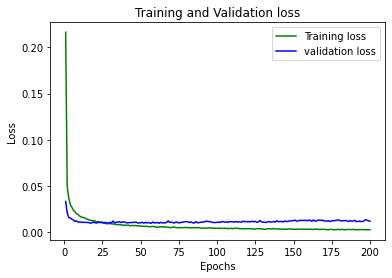

In [37]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

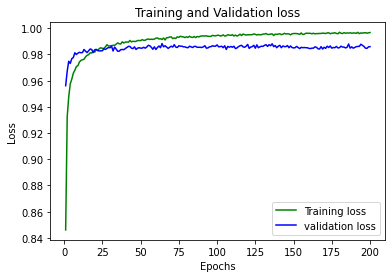

In [38]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[0 0 0 0 0 0 1 0 0 0]


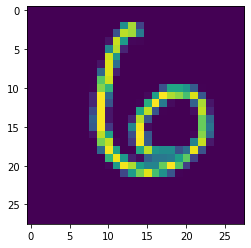

In [41]:
plt.imshow(X_test[100])
print(y_test[100])

In [43]:
print(np.argmax(model.predict(np.array([X_test[100]]))))

6


Actual Value 7
Predicted Value 7


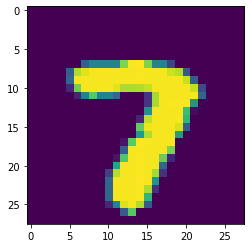

In [45]:
plt.imshow(X_test[4089])
print('Actual Value :',np.argmax(y_test[4089]))
print('Predicted Value :',np.argmax(model.predict(np.array([X_test[4089]]))))

In [46]:
model.save('mnist10_mlp_dl_assn_2.h5')